In [158]:
#loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
from scipy.stats import ttest_ind
from scipy.stats import linregress
from scipy import stats
%matplotlib inline

In [159]:
#datasets
df_socmed = pd.read_csv('hookit_data_sept17.csv', index_col=0, header=0, parse_dates=True)
df_playerdata = pd.read_csv('player_data_Sept2017.csv', index_col=0, parse_dates=True)
df_clubrev = pd.read_csv('Club Revenue Deloitte.csv', parse_dates=True)

# Scoring Likes : An exploration of what makes a professional football player popular on social media.
(Formatting/markup. ttest. organize graphs by questions. revise. submit!)

## Introduction

As part of a broad exploration on what variables drive player value and how to optimize lifetime earnings for professional soccer players, I was curious about individual player brands.  

I thought social media engagement would be a place where we could start measuring player brands and in particular look at the data on how player value relates, if at all, to social media engagement.  This line of thinking assumes that social media engagement will translate to sponsorship opportunities and increased market value.  The idea would be to apply the results of this exploration to career development strategy of our players.  

I asked three questions around this, the first, "are players with the most followers on social media the ones with the most followers on social media?  My hypothesis was that the most valuable players would also have the most followers on social media.  Cristiano Ronaldo, Lionel Messi, and Neymar da Silva Santos Junior (Neymar) have the highest market value in professional football. These three top the list of football players on social media and they are all in the top 15 most followed on social media overall. 

The second question is, "do players with the most followers on social media also belong to the clubs that have the highest revenue numbers?"  My hypothesis was that players who were most followed on social media would play at the "biggest" clubs.  I thought the most well-known, valuable, clubs would have the most popular players on social media.  I used the revenue as an indicator of club size.  In hindsight, it may have been better to find a better way to define what makes a club big. 

"Which player traits relate to interactions on social media?" is the third question I explored.  I guessed that the players who were born in Africa and South America would have more interactive fans than players born in Europe. I assumed that these players would have highly active fan bases from their home countries which would result in more buzz when these players interacted on social media.  In countries in South America and Africa where soccer is popular, soccer players who go to play in top European leagues are often regarded as national heroes.  I imagined their fan bases from home would actively support these players regardless of which team they play for.  


### About The Data

The social media data I pulled from Hookit, a company that measures and analyzes social media engagement. I downloaded the September 2017 data for football players with the most followers on social media. They only have data from Facebook, Twitter, and Instagram. This leaves a bit of a blind spot in understanding social media visibility because other major channels like Chinese site Weibo, and Snapchat. Hookit has data on interactions and engagement but the data is not audited to account for any bots or fake accounts that may skew the number of followers.  Also, this data set did not include information on who the followers are.  In addition to audited data, and data from other social media networks, expanding this data set at first to include the social media numbers for more than 100 players would greatly improve our results.  

For player value and other information about the players, like age, data of birth, and birthplace, I also used the September 2017 Transfermarkt data. Transfermarkt.de keeps track of market value of players and also logs biographical data including information on injuries and performance. The data set that we have from transfermarkt.de is a scrape of the data for over 18,000 active players.  This does not include any retired players. 

Finally, I included Deloitte's Football Money League report which is a review of the financial performance of major football clubs. The data I used is from the 2016 report, and I mainly used the revenue data.  There is a plethora of information in this report about the major clubs, but its lacking when it comes to small clubs outside of the "Big Five," league countries France, Italy, Spain, Germany, and the UK.  Information about the revenue models of these clubs, the value of their brands, ownership, performance, and strategy would be useful for creating a more comprehensive picture of the role the club businesses play in player value.   


In [75]:
#list of players according to social media following 
df_socmedtop100 = df_socmed.head(n=100)
df_socmedtop100 = df_socmedtop100.sort_values(by=['name'])



In [76]:
#list of top 10000 players in market value
df_playervalue = df_playerdata.sort_values(['Current.market.value'], ascending=[False])
df_playervalue = df_playervalue[['Name','Current.market.value']]
df_mktvaltop10000 = df_playervalue.head(n=10000)
df_mktvaltop10000 = df_mktvaltop10000.sort_values(by=['Name'])


In [77]:
#this gives you the merger of top in soc media and top in market value
#missing players on soc med list maybe not active or not in top 100 wrt followers
df_alltop = pd.merge(left=df_socmedtop100[['name']],
                     right=df_playervalue[['Name']], 
                     left_on='name',
                     right_on='Name',
                     how='inner')



In [78]:
df_playerdata_merge = pd.merge(left=df_playerdata,right=df_socmed, left_on='Name', right_on='name')

In [79]:
df_playerdata_merge['aipp'] = df_playerdata_merge.interactions_likes_comments_retweets / df_playerdata_merge.posts 

In [80]:
df_playerdata_merge = df_playerdata_merge[['Name','Age','Place.of.birth', 'Continent', 'Position', 'Foot', 'Current.market.value', 'Highest.market.value', 'Current.club','facebook', 'twitter', 'instagram', 'total_followers', 'posts','aipp']]

In [82]:
df_playerdata_merge.describe()

,Current.market.value,Highest.market.value,facebook,twitter,instagram,total_followers,posts,aipp
count,8.600000e+01,8.600000e+01,7.900000e+01,8.000000e+01,8.300000e+01,8.600000e+01,85.000000,8.500000e+01
mean,3.421802e+07,4.401453e+07,1.066789e+07,4.938853e+06,1.019717e+07,2.423531e+07,50.611765,2.135817e+05
std,2.637645e+07,2.391112e+07,1.892120e+07,8.654221e+06,1.757477e+07,4.232695e+07,28.513612,3.520223e+05
min,5.000000e+05,2.500000e+06,6.740000e+03,8.900000e+01,1.170500e+04,0.000000e+00,9.000000,2.619048e+04
25%,1.200000e+07,3.000000e+07,1.198098e+06,8.155922e+05,2.628418e+06,4.435744e+06,31.000000,5.283019e+04
50%,3.000000e+07,3.900000e+07,4.710406e+06,1.980093e+06,4.847069e+06,1.169173e+07,49.000000,8.536585e+04
75%,4.500000e+07,5.500000e+07,9.572203e+06,4.483133e+06,1.062010e+07,2.249453e+07,63.000000,2.054545e+05
max,1.200000e+08,1.200000e+08,1.225860e+08,6.037089e+07,1.123462e+08,2.953031e+08,168.000000,2.162037e+06


# Are players with the most followers on social media the players with the highest market value?

In [144]:
#sort players by market value 
df_sortmarket = df_playerdata_merge.sort_values(['Current.market.value'], ascending=[False])
df_sortmarket = df_sortmarket[['Name','Current.market.value']]

In [145]:
#sort players by total followers
df_sortfollowers = df_playerdata_merge.sort_values(['total_followers'], ascending=[False])
df_sortfollowers.head()
df_sortfollowers = df_sortfollowers[['Name','total_followers']]


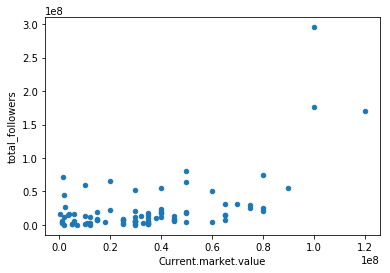

In [146]:
df_playerdata_merge.plot(kind='scatter', x='Current.market.value', y='total_followers')

When we look at the current market value and number of followers, there is not a clear correlation between these two variables.  I guessed that the players with the highest market value would have the most followers because of players like Messi, Ronaldo, and Neymar who are not only top in social media in football but also three of most followed individuals on social media globally, irrespective of industry.  I thought that market value would translate to brand value and perhaps social media followers would be a brand value indicator. When we remove these three outliars and just look at the rest of the data, there are plenty of examples here of low market value and high numbers in social media followers.  

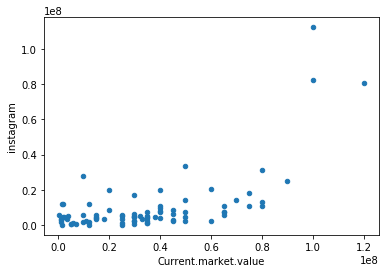

In [147]:
df_playerdata_merge.plot(kind='scatter', x='Current.market.value', y='instagram')

We are looking here at the relationship between market value and social media followers, but only instagram. This looks quite similar to the total followers scatter above. I thought maybe instagram would be more closely tied to market value because of its focus on photos and video which would make it an appealing channel for sponsors.  One think to consider is that this fixed point in time so in the future we could look at the change in market value over time against the growth of followers over time. 

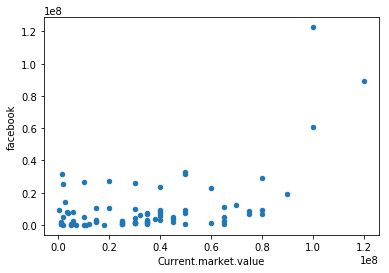

In [149]:
df_playerdata_merge.plot(kind='scatter', x='Current.market.value', y='facebook')

Again, this scatter plot of market value and facebook followers looks similar to the prior two graphs of instagram and total followers.  

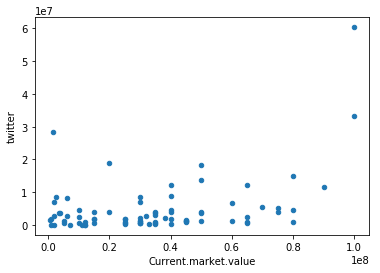

In [150]:
df_playerdata_merge.plot(kind='scatter', x='Current.market.value', y='twitter')

The number of twitter followers and plotted against market value does not indicate a relationship. One data point which stands out is where a player with the lowest market value has the third highest number of followers on twitter.  It is Kaka, who is a famous Brazilian player who is worth less than a million Euros but he has 28 million twitter followers. This raises an interesting question about how players or clubs can capitalize on brand even when they are not as valuable to the clubs as a player.  He is moving to a club in the U.S. where the MLS employs a strategy of bringing well known players from European clubs who are extremely popular but not too expensive to improve the prestige and visibility of the club. 

In [151]:
df_socmedbar = df_playerdata_merge.sort_values(by=['total_followers'], ascending=False)
df_socmedbar = df_socmedbar.set_index('Name')


In [152]:
df_socmedbar = df_socmedbar[['facebook', 'twitter', 'instagram']]

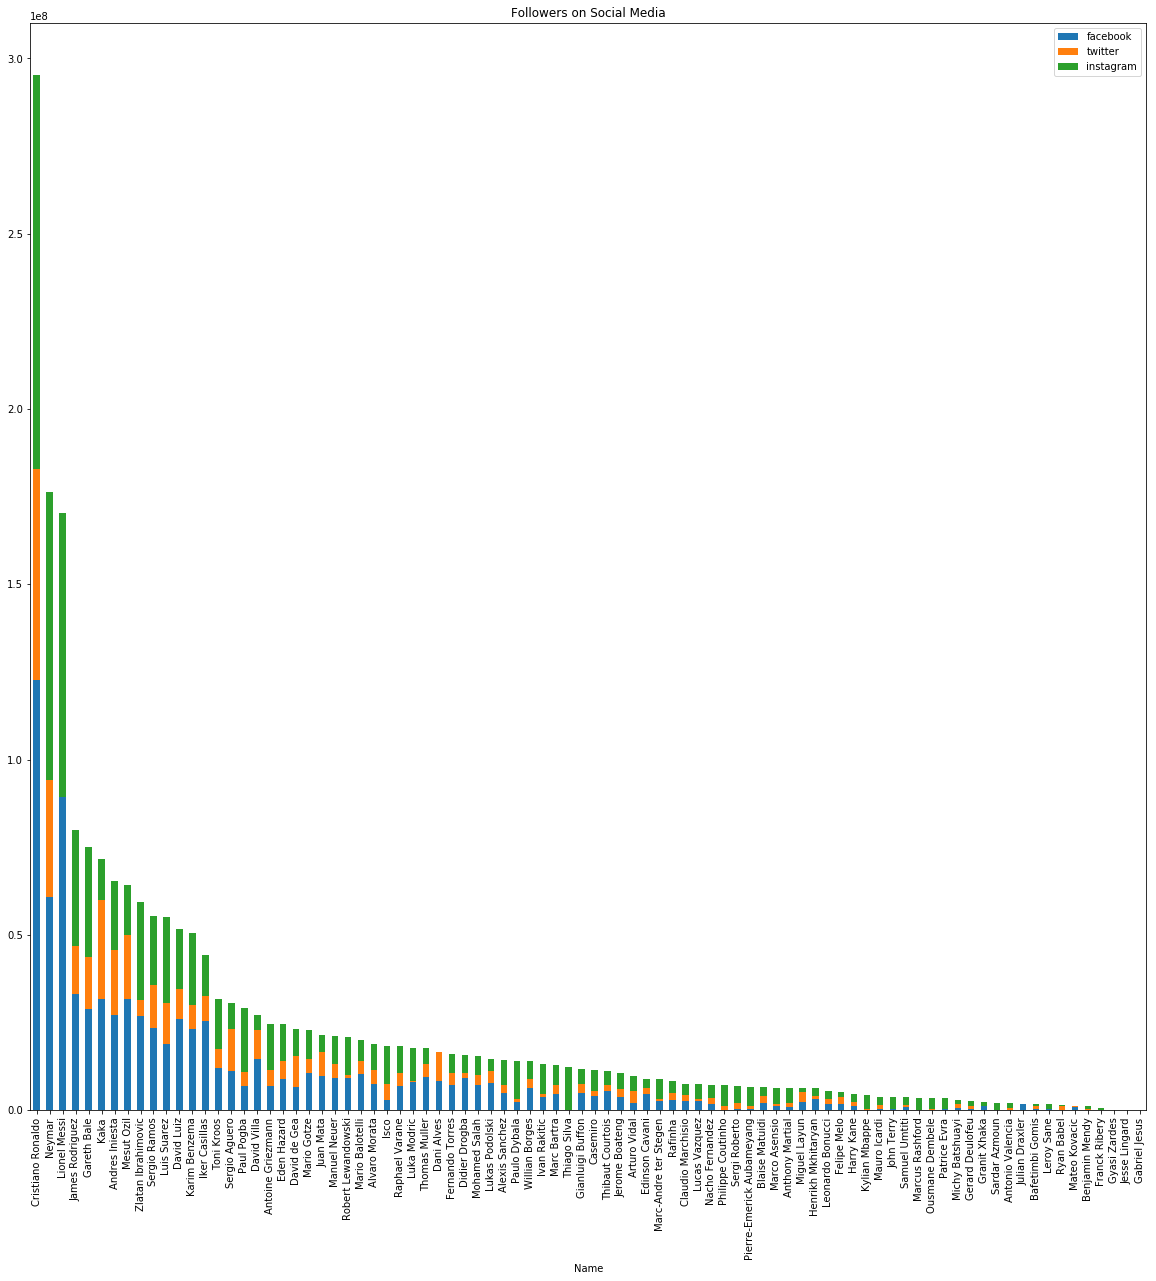

In [153]:
ax = df_socmedbar.plot(kind='bar', title = 'Followers on Social Media', stacked=True, figsize=(20, 20))

The bar plot on total followers shows the number of followers for each active player in the top 100 for social media followers.  This graph breaks down the number of followers into the three major channels (in the West), facebook, twitter, and instagram.  Would be useful to see the numbers over time to see for example, if instagram is growing as a platform and twitter is shrinking how that impacts this breakdown. Messi has the third most followers but they are made up of facebook and instagram only.  If he made a twitter account perhaps he would surpass Ronaldo and Neymar in total number of followers.  An interesting thing to note about the case of Messi is that he does not run his own social media accounts.  He is not a fan of social media so its amazing that he has so many followers with few posts and the open admission that it is not him.  Exploring authenticity of the accounts to see how many of these players in the top 100 are posting themselves or if their account is run by a staff.  The impact of this might not show up in number of followers, but it could be evident in interactions.

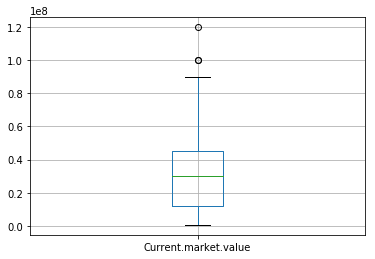

In [154]:
df_playerdata_merge.boxplot(column='Current.market.value')

This boxplot shows the range of the current market values of players in the top 100 on social media. 

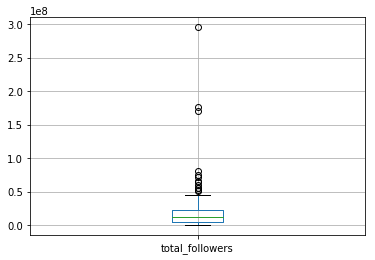

In [155]:
df_playerdata_merge.boxplot(column='total_followers')

This boxplot shows the total number of followers for the football players who have the most followers.

In [156]:
totfo = df_playerdata_merge.iloc[:, -3]
totfo = totfo.dropna()
cmv = df_playerdata_merge.iloc[:,-9]
cmv = cmv.dropna()

sp.stats.ttest_ind(totfo, cmv, equal_var=False)

Ttest_indResult(statistic=-1.8562423959973864, pvalue=0.065486139274665914)

The ttest looks to see if we can reject the null hypothesis that player value does mean a player will have more followers. Its close to the .05 threshold so it is advisable to look at a wider data set and check again to see if we get different results. 

# Do players with the most followers on social media also belong to the clubs that have the highest revenue numbers?

In [160]:
df_playerdata_addrev = pd.merge(left=df_playerdata_merge,right=df_clubrev, left_on='Current.club', right_on='Club')

In [161]:
df_playerdata_addrev = df_playerdata_addrev.sort_values(by=['Club Revenue'], ascending=[False])

In [162]:
df_playerdata_addrev2 = df_playerdata_addrev.drop(df_playerdata_addrev.tail(n=6).index)

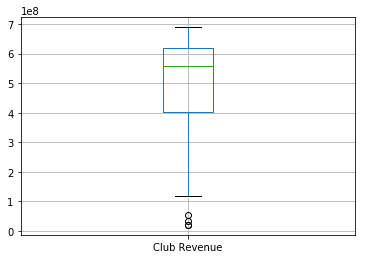

In [163]:
df_playerdata_addrev2.boxplot(column='Club Revenue')

The club revenue data for the players who are top in social media followers.

In [164]:
df_playerdata_addrev2.rename(columns={'Current.club': 'Current_club'}, inplace=True)

Text(0.5,1,'Current club for players top in social media')

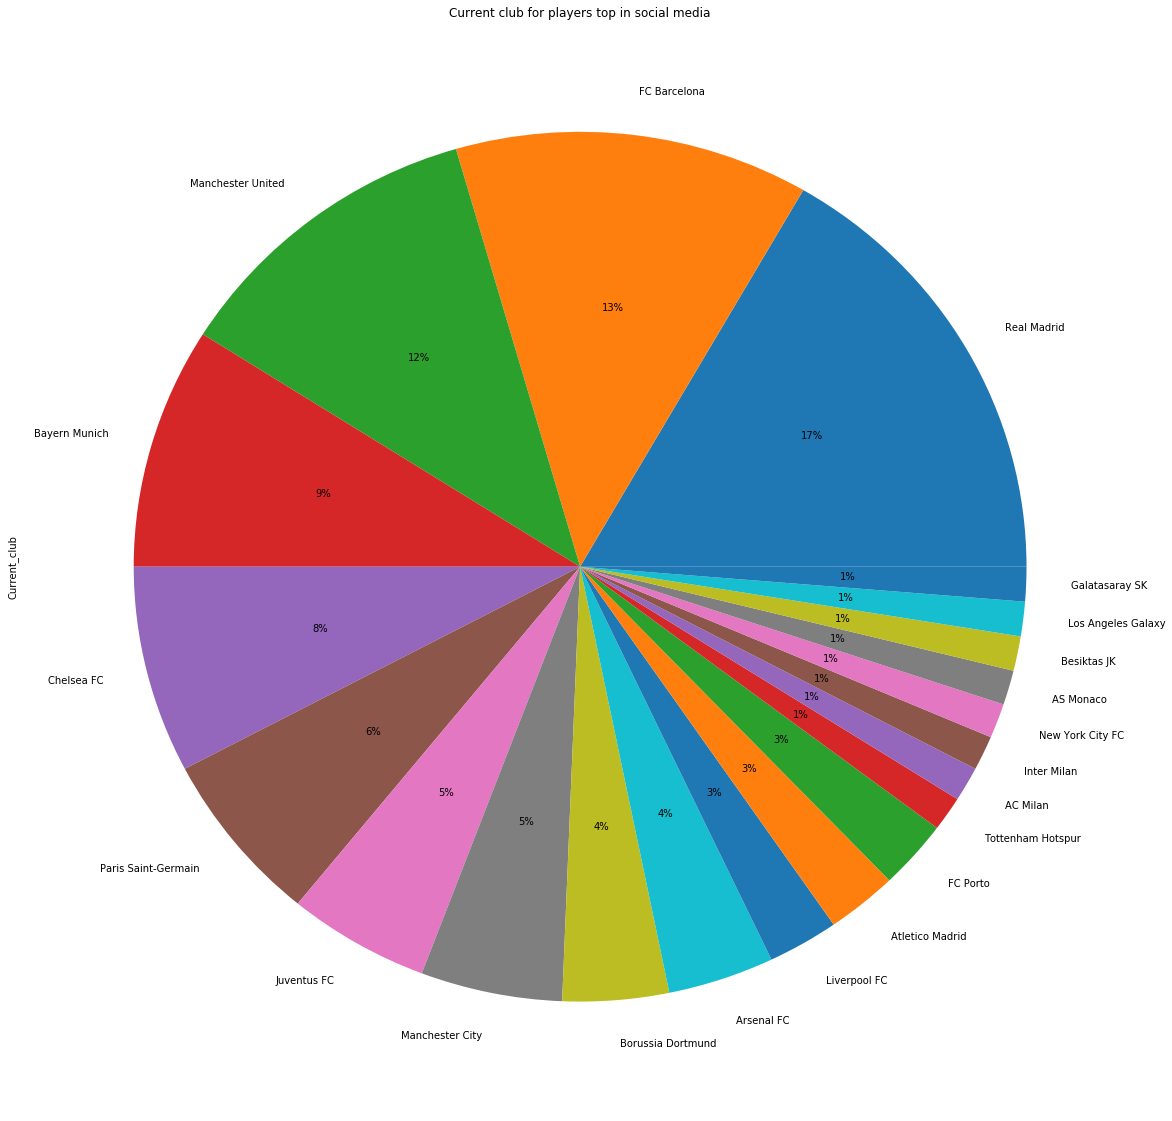

In [166]:
df_playerdata_addrev2.Current_club.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(20,20))
plt.title('Current club for players top in social media')


This pie plot show the home club for players who have the most followers on social media. It's surprising to me how many clubs are represented on this list.  I would have predicted that these players would mostly be from the top 10 clubs in terms of revenue numbers.  One thing to look at would be, have these players at some point played at the clubs with the most revenue.  Looking at their careers, they could have gained recognition at Manchester United in the past, but now they play at an MLS team.  Did their visibility spike when they went to a certain club?  Another useful scenario to look for is any player that did not pass through a top team but still has a huge presence on social media.

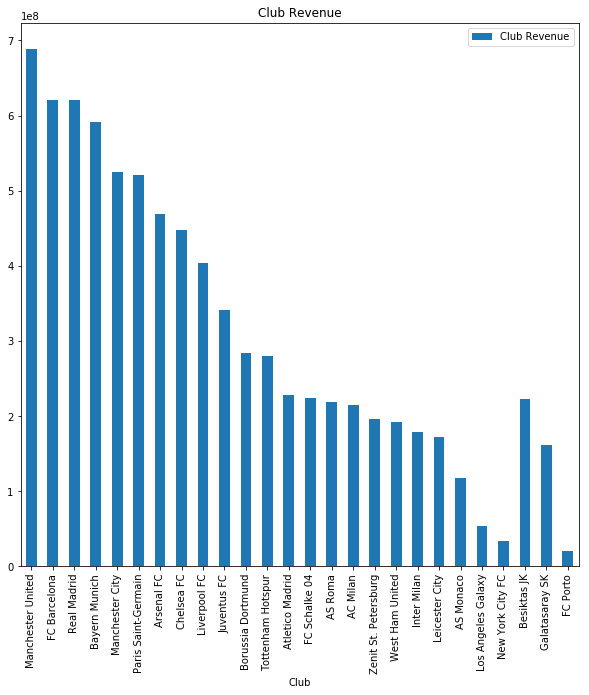

In [167]:
df_clubrev = df_clubrev.dropna()
df_clubrev = df_clubrev.set_index('Club')
df_clubrev.plot(kind='bar', title = 'Club Revenue', stacked=True, figsize=(10, 10))

The professionall football players who currently have the most followers in social media play for the clubs listed in the bar plot.  Here we can see the revenue numbers for 2016 for these clubs.  This data is from Deloitte's annual report on football called the Deloitte Football Money League.  I was using this data to look to see if the clubs with the most revenue are also the clubs who house the players top in social media.  In hindsight it may have been better to look at social media presence of the clubs and also to look at market value of club rather than revenue.  Clubs have varying revenue models and growth strategies so there are a lot of factors here that make it difficult to draw any conclusions.  We could zero in on something like how much the transfer to a club impacts a player's social media account to see if certain clubs have impact on social media visibility.

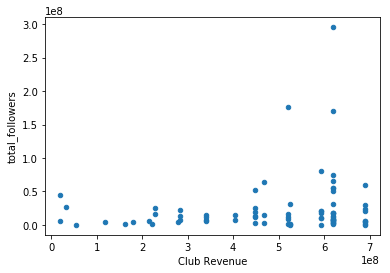

In [168]:
df_playerdata_addrev2.plot(kind='scatter', x='Club Revenue', y='total_followers')

In any case, here we see that club revenue has no relationship with number of followers that these players have.  

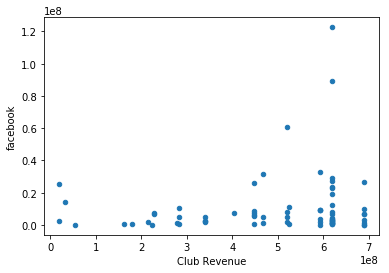

In [169]:
df_playerdata_addrev2.plot(kind='scatter', x='Club Revenue', y='facebook')

Looking at just facebook does not change the results much.

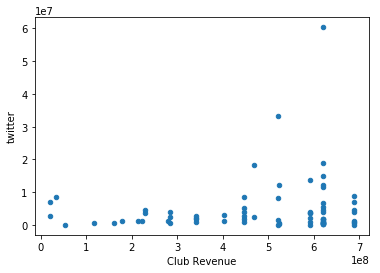

In [170]:
df_playerdata_addrev2.plot(kind='scatter', x='Club Revenue', y='twitter')

Nor does looking at only twitter.

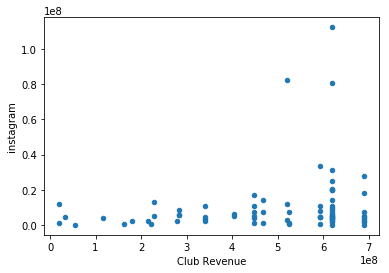

In [171]:
df_playerdata_addrev2.plot(kind='scatter', x='Club Revenue', y='instagram')

Instagram looks just the same as the others in terms of a player's followers and the revenue for the club where they play

In [172]:
crev = df_playerdata_addrev2.iloc[:, -1]
totfo = df_playerdata_addrev2.iloc[:, -5]
totfo = totfo.dropna()

In [173]:
sp.stats.ttest_ind(totfo, crev, equal_var=False)

Ttest_indResult(statistic=-21.789839585748208, pvalue=9.9492887809053235e-37)

The ttest is showing what we have seen in the scatter plot which is that there is no relationship between revenue of the host club and the number of social media followers of these players.  One application of this outcome relates to career trajectory.  If you are a player who cares about building your brand and your social media footprint, going to a club that has a low revenue number does not mean that you won't be able to build a fan base on social media.  It leads to a question of where along the way were the spikes in growth of the followers.  For example, did any specific events, like an award or big transfer affect the accumulation of new followers.

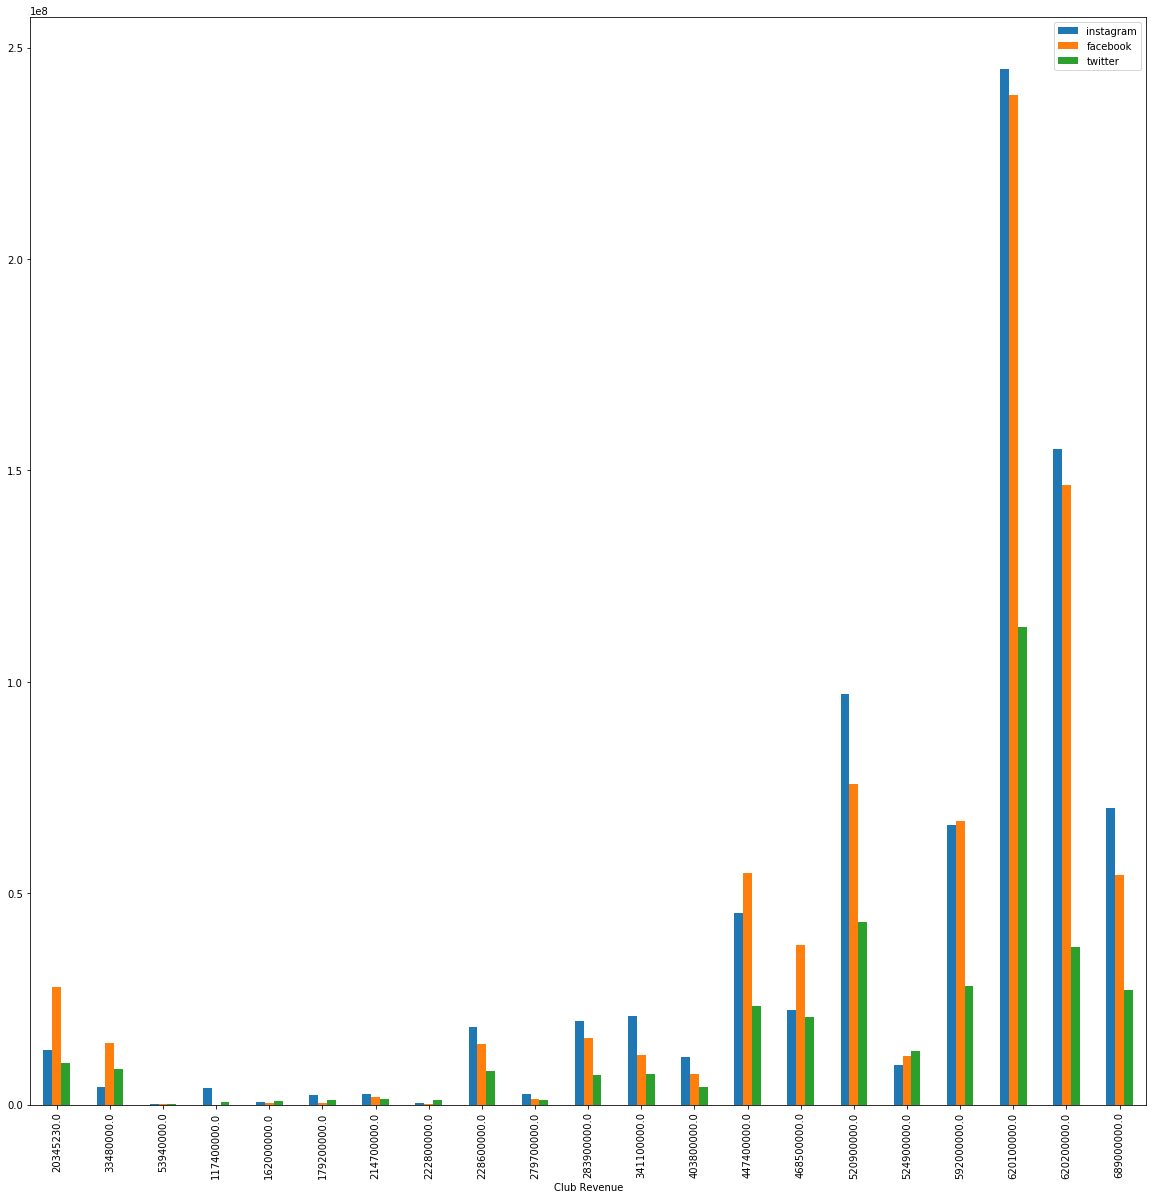

In [174]:
group_data = df_playerdata_addrev2.groupby(['Club Revenue'])['instagram','facebook', 'twitter'].sum()
group_data.plot.bar(figsize=(20, 20))

The professionall football players who currently have the most followers in social media play for the clubs listed in the bar plot.  Here we can see the revenue numbers for 2016 for these clubs.  This data is from Deloitte's annual report on football called the Deloitte Football Money League.  I was using this data to look to see if the clubs with the most revenue are also the clubs who house the players top in social media.  In hindsight it may have been better to look at social media presence of the clubs and also to look at market value of club rather than revenue.  Clubs have varying revenue models and growth strategies so there are a lot of factors here that make it difficult to draw any conclusions.

# What player traits relate to interactions on social media?

In [ ]:
#add discussion here...first explore the players with most followers.  then look at interactions.  this assumes most folloewrs would have most interactions, but maybe there are examples of low followers high interacitons
#add graph of interactions and followers. 

In [176]:
df_playerdata_merge[['Age']] = df_playerdata_merge[['Age']].apply(pd.to_numeric)

In [177]:
df_playerdata_merge['Age'].median()

27.5

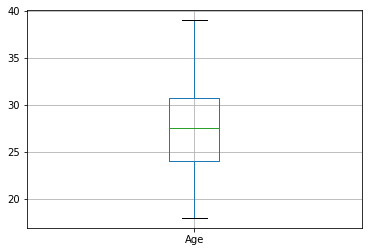

In [178]:
df_playerdata_merge.boxplot(column='Age')

The age range of the players who are in the top 100 in social media is between 18 and 39 with the average age at just under 28. Professional players range between 16 and 48 and peak at 27.5.  I thought that the top players on social media would be a bit younger because they likely would be more active on social media.  Though it makes sense that the average would be in line with the career peak.  It will be interesting to see if the players who are popular now end up with a greater presence in social media than the current stars because of the growth of the social media channels along with other factors.  

(array([  4.,   4.,  15.,  16.,  10.,  15.,   9.,   5.,   6.,   2.]),
 array([ 18. ,  20.1,  22.2,  24.3,  26.4,  28.5,  30.6,  32.7,  34.8,
         36.9,  39. ]),
 <a list of 10 Patch objects>)

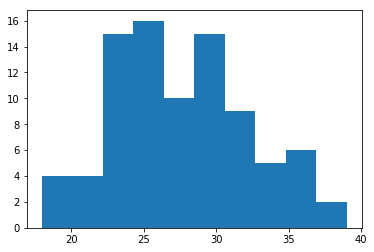

In [179]:
plt.hist(df_playerdata_merge.Age)

(array(1.0), array(25.0))

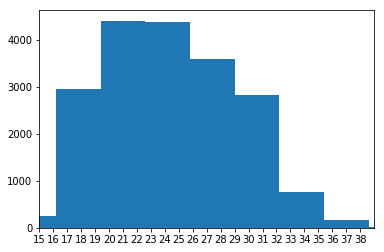

In [180]:
plt.hist(df_playerdata.Age)
x = np.arange(16, 40, 1)
plt.xticks(x)
plt.xlim(16,40)

This histogram shows the distribution of ages of all currently active football players.  Its skewed right because    professional careers for the majority of players begin at age 16 and on average do not last more than a few years.

In [182]:
age = df_playerdata_merge.iloc[:, -14]
sp.stats.ttest_ind(totfo, age, equal_var=False)

Ttest_indResult(statistic=5.0276325435642786, pvalue=3.153766264999314e-06)

We conducted this ttest to see if we could reject the null hypothesis that player age is not related to number of followers.  Since the pvalue is so high, we can't say that player age has anything to do with number of followers a player has on social media.     

Text(0.5,0,'All Active Players')

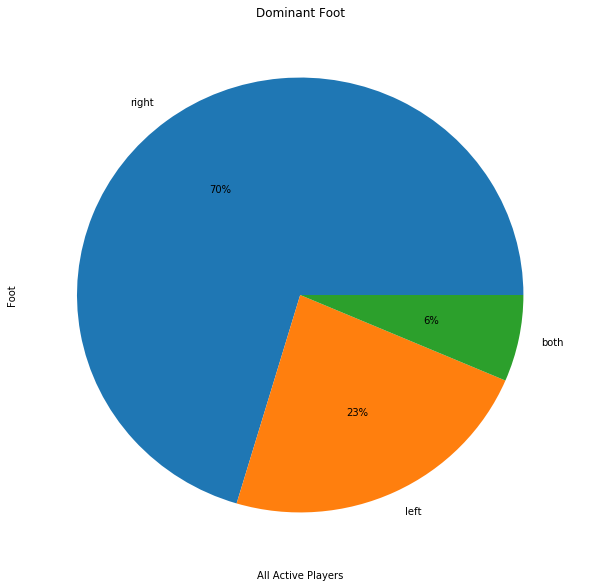

In [83]:

df_domfoot =df_playerdata.sort_values(by=['Foot'])
df_domfoot = df_domfoot[df_domfoot.Foot != 'Midfield - Defensive Midfield']
df_domfoot = df_domfoot[df_domfoot.Foot != 'Undefined']
df_domfoot = df_domfoot.dropna(subset=['Foot'])
df_domfoot.Foot.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(10,10))
plt.title('Dominant Foot')
plt.xlabel('All Active Players')


Of over 18,000 active professional football players, 70 percent are right footed,23 percent are left footed and six  percent use both

Text(0.5,0,'Top in Soc Media')

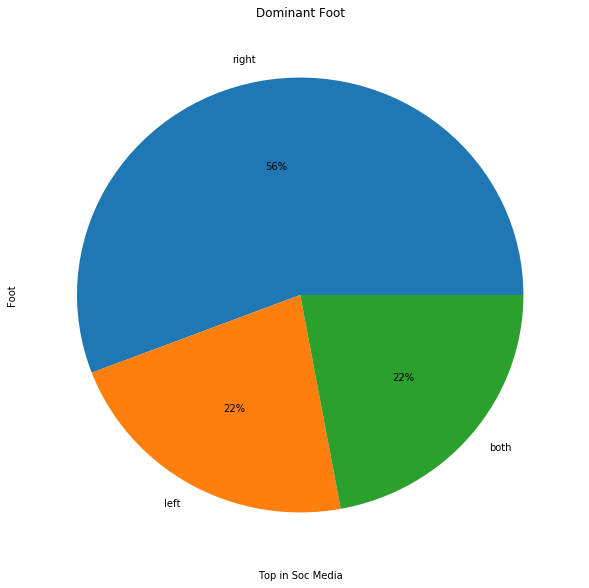

In [85]:
#Q3
df_playerdata_merge.Foot.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(10,10))
plt.title('Dominant Foot')
plt.xlabel('Top in Soc Media')

When we look at just the players who are most followed on social media, the percentage of players who can play with  both feet equally increases significantly. Players who can play with both feet may be more popular because they have more technical skill but we do not know about the relationship between performance and number of followers.

Text(0.5,0,'All Active Players')

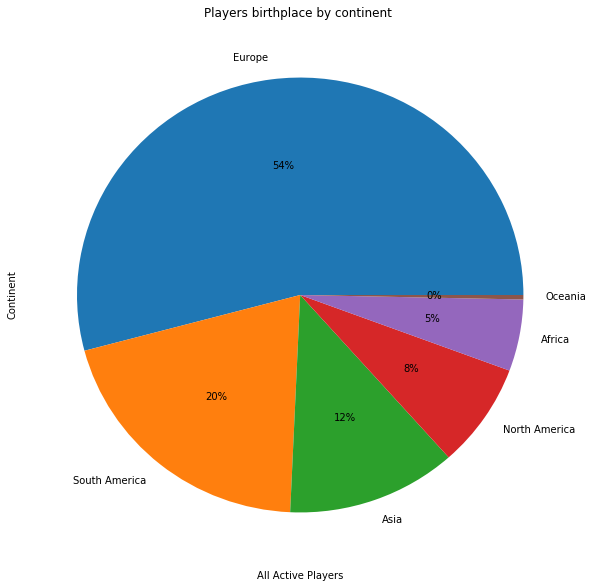

In [188]:
df_playerdata.Continent.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(10,10))
plt.title('Players birthplace by continent ')
plt.xlabel('All Active Players')

The continents where all active players were born.  We see here that just over half of the players were born in Europe. We look below to see how the chart changes when we only look at the players in top 100 for social media followers.

Text(0.5,0,'Players in top 100 Social Media')

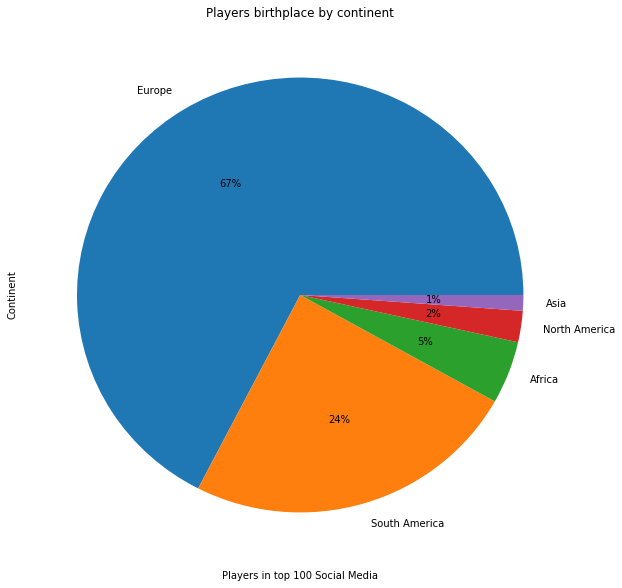

In [190]:
df_playerdata_merge.Continent.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(10,10))
plt.title('Players birthplace by continent')
plt.xlabel('Players in top 100 Social Media')

The proportion of players born in Europe and South America go up compared to the data set of all active players.  Africa is represented the same in both chart, but North America and Asia fall off quite a bit.

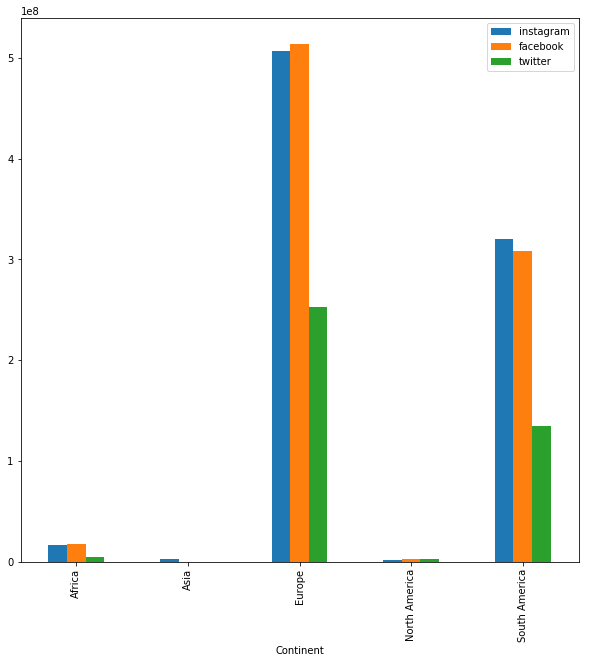

In [191]:
group_data_cont = df_playerdata_merge.groupby(['Continent'])['instagram','facebook', 'twitter'].sum()
group_data_cont.plot.bar(figsize=(10, 10))

Looking here we see that players birth continents do not signficantly impact the channels that are used. The distribution of followers across the different channels is roughly proportional for players born on different continents. It does lead to a limitation of this data in that we are only seeing the Western social media channels.  In China Weibo has 600 million users and the Chinese have an incredible amount of soccer fans, especially since the current President is a superfan himself.  The Chinese paid for the rights to broadcast the English Premier League in China, so not including the Weibo is a major hole in the data and it will become more important as the Chinese Super League continues to make massive investments in foriegn players.

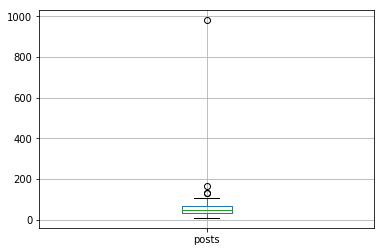

In [192]:
df_socmed.boxplot(column='posts')

The number of posts for the month of September by the players. Most players on this list are posting between 31 and 63.

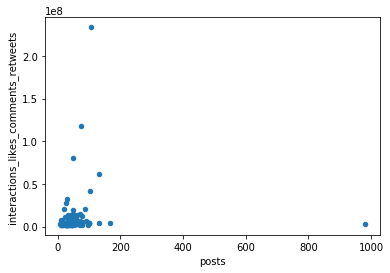

In [140]:
df_socmed.plot(kind='scatter', x='posts', y='interactions_likes_comments_retweets')

More posts does not mean more interactions. Its counterintuitive.  I would imagine that the players who were more active would get more interactions but the data does not reflect that.  The strategy of just posting more to get more interaction does not seem to be valuable.  Quality of posts may play a role in predicting the level of response.

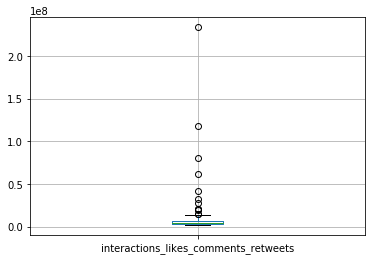

In [184]:
df_socmed.boxplot(column='interactions_likes_comments_retweets')

This shows the number of interactions as in likes, comments, and retweets of the player posts.

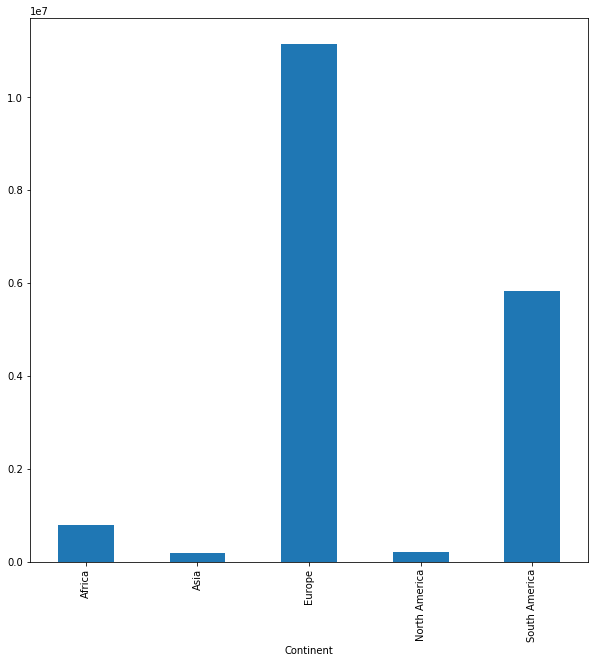

In [193]:
group_data_cont = df_playerdata_merge.groupby(['Continent'])['aipp'].sum()
group_data_cont.plot.bar(figsize=(10, 10))


This graph shows the number of interactions per post for players born on the different continents.  I was looking here to see if players who are born outside of the big five leagues had more interactive fan bases than the players born in Europe.  The players born in Europe and South America have the most interactions per post.  It would be good to dig deeper into the makeup of the followers of these players. Learning about the fan bases for these players can lead to a lot of insight on looking for sponsorship opportunities, as one application. 

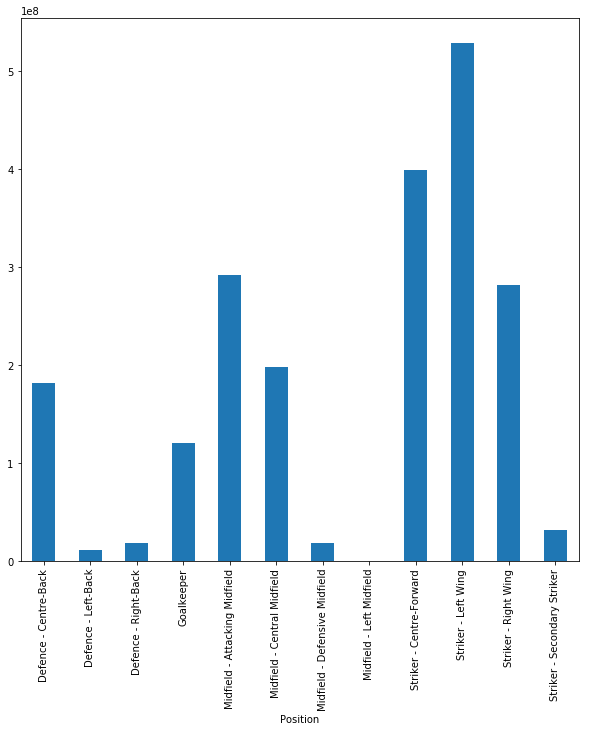

In [194]:
group_data_pos = df_playerdata_merge.groupby(['Position'])['total_followers'].sum()
group_data_pos.plot.bar(figsize=(10, 10))

Unsurprisingly, the players with the most followers on social media are strikers followed by attacking midfielders and then defensive players.  The only woman to make the list for players with the most followers is the US goalkeeper Hope Solo.  Strikers are generally the most popular players.  It could be that these players are most followed because they are tied to the most clear metric in football, a goal.  Anyone, football fan or not, can understand the impact of a player who scores the most goals. Defense takes more nuance to measure so maybe that is a contributing factor. It also could be personality traits related to football players who choose to be strikers.

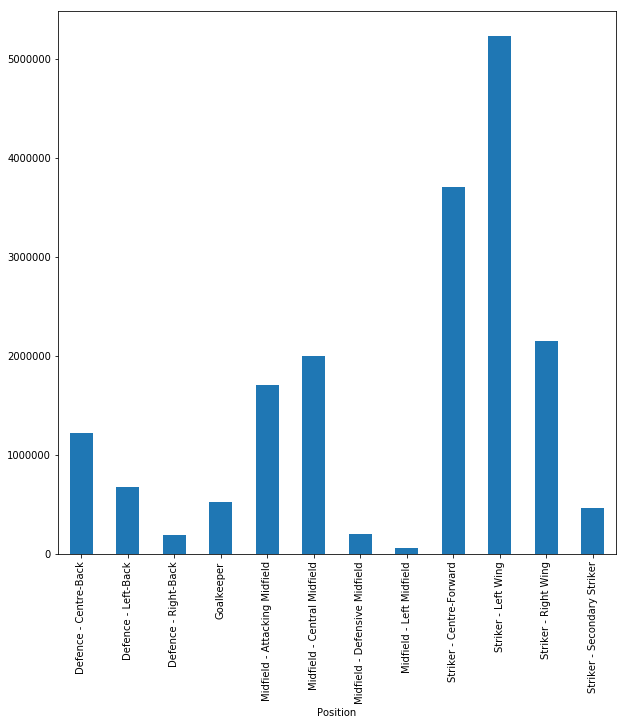

In [195]:
group_data_cont = df_playerdata_merge.groupby(['Position'])['aipp'].sum()
group_data_cont.plot.bar(figsize=(10, 10))

Aligned with the data on number of followers, the same positions are getting the most interaction per post. 

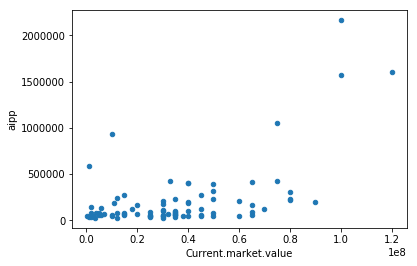

In [197]:
df_playerdata_addrev.plot(kind='scatter', x='Current.market.value', y='aipp')

In [198]:
cmv = df_playerdata_addrev2['Current.market.value']
aipp = df_playerdata_addrev2['aipp']
aipp = aipp.dropna()
sp.stats.ttest_ind(cmv, aipp, equal_var=False)

Ttest_indResult(statistic=12.715130138605467, pvalue=1.3197396538813868e-20)

We cannot reject the null hypothesis that market value of the player has no impact on interactions per post.

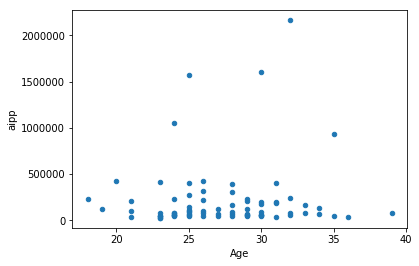

In [199]:
df_playerdata_addrev2.plot(kind='scatter', x='Age', y='aipp')

Age does not impact the amount of interaction per post that players are getting.  Looking into the content that these players are posting to see what content gets the most interaction with followers would help inform a social media strategy for a player. It could be a quick win, particularly players with lots of followers.

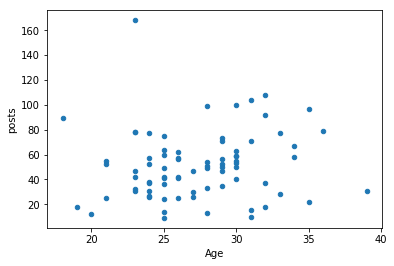

In [200]:
df_playerdata_addrev2.plot(kind='scatter', x='Age', y='posts')

I would imagine that younger players would post significantly more than the older polayers.  Perhaps if we had data for the top 5000 players in social media followers we would see a relationship but here there is no evidence for that at all.

## Conclusion

Exploring these three questions lead to many more questions and a need for more data.  On the question about market value and number of followers, there was no clear correlation, however with an expansion of the Hookit data set that included number of followers for a thousand players or more could offer a clearer conclusion on whether these two variables are related.  As mentioned at the outset, not only more data from three most common channels: Facebook, Instagram and Twitter, it would be worth it to collect data from Weibo and Snapchat as well to get an even better view of this question.  

I did not see any clear relationship between revenue of the clubs and number of followers.   

In the exploration of factors that contribute to interactions per follower.  I didn't find age or birth continent to be a contributer to number of posts or interactions.  I am thinking that content might drive interaction but further resesarch is required to see if that is true.   


As the next step to tackle the exploration of player presence on social media, I would like to build out the data sets as porposed (list here) and then use it to look at the growth of player engagment on social media over the course of their entire professional careers. In this study we could look at the same questions in greater depth but we could also look for patterns and events that lead to a growth or decline in social media engagement and player brand over time.  

I would like to find other indicators of player brand beyond just social media engagement. 
I would also like to learn more about the followers and the player/follower engagement on social media.
 

